# Final Project Submission

* Student name: Sabina Bains
* Student pace: Self Paced
* Scheduled project review date / time: Friday, 9/24/21
* Instructor name: Claude Fried
* Blog post URL: ??

# Microsoft Movie Studio Analysis

## Objective:

This analysis explores data 

## Business Problem

Explore movie data and provide insights for Microsoft to successfuly launch their movie studio??????????

### Importing Packages and Reading in Files

In [1]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import statistics
import os

%matplotlib inline

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-talk')

In [2]:
#Viewing and changing filenames for easier file importing
filenames = os.listdir('zippedData')
paths = []

for file in filenames:
    paths.append('zippeddata/'+file)
    
for num, name in enumerate(paths):
    print(num, name)

0 zippeddata/imdb.title.crew.csv.gz
1 zippeddata/imdb.title.basics.tsv.gz
2 zippeddata/tmdb.movies.csv.gz
3 zippeddata/imdb.title.akas.csv.gz
4 zippeddata/imdb.title.ratings.csv.gz
5 zippeddata/imdb.name.basics.csv.gz
6 zippeddata/rt.reviews.tsv.gz
7 zippeddata/imdb.title.basics.csv.gz
8 zippeddata/rt.movie_info.tsv.gz
9 zippeddata/tn.movie_budgets.csv.gz
10 zippeddata/bom.movie_gross.csv.gz
11 zippeddata/imdb.title.principals.csv.gz


#  1: TOP GENRES BY MEDIAN PROFIT

In [228]:
#importing profit dataset
profit = pd.read_csv(paths[9])

In [229]:
# Importing Genre Data and Filtering on Type = Movie
genres = pd.read_csv(paths[1],sep="\t",low_memory=False)
genres = genres.loc[genres['titleType']=='movie']

In [230]:
genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8230824,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
8230851,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
8230863,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
8230874,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [5]:
# creating a new column "startYear" based on the year part of the release date for merging with the sales data.
profit['startYear'] = profit['release_date'].map(lambda x : x[-4:])
profit.rename(columns={'movie':'primaryTitle'}, inplace=True)

In [6]:
# merging on movie title and year release 
f = pd.merge(genres,profit,on=['primaryTitle','startYear'],how='inner')

In [7]:
# Removing "," and "$" from dollar columns to turn into type int
f_dollar_cols = ['production_budget', 'domestic_gross','worldwide_gross']
for i in f_dollar_cols:
    f[i]=f[i].str.replace('$','')
    f[i]=f[i].str.replace(',','').astype(int)
f['profit']=f['worldwide_gross']-f['production_budget']

In [355]:
f['Budget (MM)'] = f['production_budget']/1000000
f['Profit (MM)'] = f['profit']/1000000
f['Gross (MM)'] = f['worldwide_gross']/1000000

In [40]:
ani = f[f['genres'].str.contains("Animation")]

In [153]:
ani.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,Budget (MM),Profit (MM)
count,227.000000,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,227.000000,227.000000
mean,51.933921,7.819192e+07,1.166257e+08,2.923981e+08,2.142062e+08,78.191917,214.206222
std,28.782524,5.327157e+07,1.051686e+08,2.795903e+08,2.502060e+08,53.271571,250.205972
min,1.000000,7.500000e+05,0.000000e+00,0.000000e+00,-1.104502e+08,0.750000,-110.450242
25%,29.500000,3.500000e+07,3.775230e+07,6.987402e+07,2.473589e+07,35.000000,24.735888
50%,50.000000,7.500000e+07,8.608951e+07,2.136913e+08,1.368277e+08,75.000000,136.827677
75%,77.000000,1.105000e+08,1.703960e+08,4.458375e+08,3.281741e+08,110.500000,328.174116
max,100.000000,2.600000e+08,6.085817e+08,1.272470e+09,1.122470e+09,260.000000,1122.469910


In [66]:
#Creating Deduplicated list of Genres to use as Keys for Dictionary
genre_list = f.genres.str.split(',').to_list()
genre_list = list(set(list(chain.from_iterable(genre_list))))

In [68]:
#creating dictionary with values as lists to map ratings to genres
genre_dict={}
for item in genre_list:
    genre_dict[item] = []
    
val_dict={}
for item in genre_list:
    val_dict[item] = []

In [69]:
#appending values from df to dictionary based on genre key
for index, row in f.iterrows():
    for genre in val_dict:
        if genre in row['genres']:
            val_dict[genre].append(row['Profit (MM)'])

In [74]:
budget_dict= genre_dict.copy()
for index, row in f.iterrows():
    for genre in budget_dict:
        if genre in row['genres']:
            budget_dict[genre].append(row['Budget (MM)'])

In [76]:
# statistics.median(budget_dict['Animation'])

In [130]:
# calculating count of movies in each genre (so we can exclude genres with low movie sample)
count_dict = genre_dict.copy()
for i in count_dict:
    count_dict[i] = len(count_dict[i])

In [142]:
# calculating average rating per Genre
median_val_dict = {}
for i in val_dict:
    median_val_dict[i] = statistics.median(val_dict[i])

In [143]:
# calculating average rating per Genre
budget_val_dict = {}
for i in budget_dict:
    budget_val_dict[i] = statistics.median(budget_dict[i])

In [144]:
#creating df from ratings column from dictionary
profit_by_genre = pd.DataFrame(median_val_dict,index=['Median Profit (MM)'])
profit_by_genre = profit_by_genre.transpose()
profit_by_genre = profit_by_genre.reset_index()

In [145]:
budget_by_genre = pd.DataFrame(budget_val_dict,index=['Median Budget (MM)'])
budget_by_genre = budget_by_genre.transpose()
budget_by_genre = budget_by_genre.reset_index()

In [146]:
#creating df with count column from dictionary
count_by_genre = pd.DataFrame(count_dict,index=['Count'])
count_by_genre = count_by_genre.transpose()
count_by_genre = count_by_genre.reset_index()

In [147]:
# final merge onto genre column for analysis
genre = pd.merge(profit_by_genre, budget_by_genre, on="index")
genre = pd.merge(genre, count_by_genre, on="index")
genre.rename(columns={'index':'Genre'},inplace=True)

In [148]:
# filtering out any genre column that has less than 10 movies represented and sorting by highest rating
genre = genre.loc[genre['Count'] >= 10].reset_index(drop=True)
genre = genre.sort_values('Median Profit (MM)', ascending = False)

In [149]:
genre = genre.drop(columns='Count')

In [150]:
genre = genre.head(10)

In [151]:
genre = genre.melt(id_vars='Genre').rename(columns=str.title)

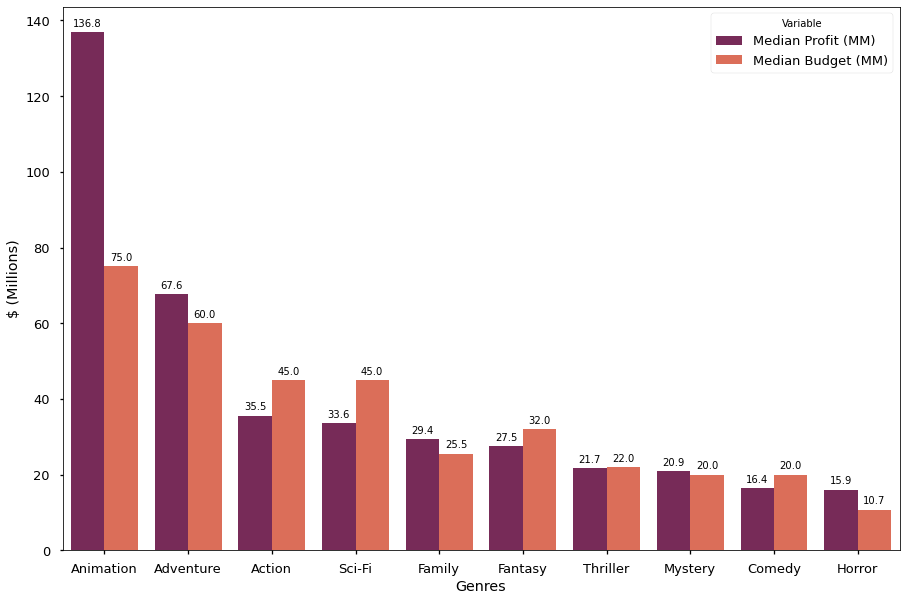

In [193]:
fig, ax = plt.subplots(figsize=(15, 10))

barplot = sns.barplot(x='Genre', y='Value', hue='Variable', data=genre, palette="rocket", ax=ax)
ax.set(xlabel='Genres', ylabel='$ (Millions)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [190]:
def top_in_genre(genre):
    cols=['primaryTitle', 'release_date',
       'runtimeMinutes','genres',
       'production_budget','worldwide_gross', 'profit']
    df = f[cols]
    df = df.loc[df['genres'].str.contains(genre)]
    df = df.sort_values(by='profit',ascending=False).head(5)
    return df

In [195]:
top_in_genre('Adventure')

,primaryTitle,release_date,runtimeMinutes,genres,production_budget,worldwide_gross,profit
2491,Avatar,"Dec 18, 2009",162,"Action,Adventure,Fantasy",425000000,2776345279,2351345279
4110,Avengers: Infinity War,"Apr 27, 2018",149,"Action,Adventure,Sci-Fi",300000000,2048134200,1748134200
1987,Jurassic World,"Jun 12, 2015",124,"Action,Adventure,Sci-Fi",215000000,1648854864,1433854864
3890,Furious 7,"Apr 3, 2015",137,"Action,Adventure,Thriller",190000000,1518722794,1328722794
2617,The Avengers,"May 4, 2012",143,"Action,Adventure,Sci-Fi",225000000,1517935897,1292935897


# SUGGESTION 2 

#don't need the region when merging with profit since they are all US, can skip the beginning merge

In [403]:
#read in data, merge together
namebasics = pd.read_csv(paths[5])
titleps = pd.read_csv(paths[11])
crew = pd.merge(titleps,namebasics,on='nconst',how='left')
#merge with financial data
fcrew = pd.merge(crew,f,on='tconst',how='inner')

In [404]:
fcrew['Budget (MM)'] = fcrew['production_budget']/1000000
fcrew['Profit (MM)'] = fcrew['profit']/1000000
fcrew['Profit (B)'] = fcrew['profit']/1000000000
fcrew['Gross (MM)'] = fcrew['worldwide_gross']/1000000

In [405]:
#keep certain cols
crew_cols = ['category','tconst','primary_name','characters','primaryTitle','genres','release_date',
            'Budget (MM)','Gross (MM)','Profit (MM)','Profit (B)']
fcrew = fcrew[crew_cols]

In [406]:
fcrew['category'].unique()

array(['cinematographer', 'actor', 'director', 'producer', 'composer',
       'actress', 'writer', 'editor', 'production_designer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [407]:
#filter on genres based on last suggestion
animation = fcrew.loc[fcrew['genres'].str.contains('Animation')]
action = fcrew.loc[fcrew['genres'].str.contains('Adventure')]
comedy = fcrew.loc[fcrew['genres'].str.contains('Comedy')]

# fcrew = pd.concat(animation,action,comedy)
fcrew = animation.append([action, comedy])

In [501]:
def top_crew(df,category_list,chart_title):
    df = df.loc[df['category'].isin(category_list)] 
    df = df.groupby('primary_name')['Profit (B)'].agg(['sum','count']).reset_index()
    df.sort_values('sum',ascending=False,inplace=True)
    df = df.drop_duplicates()
    
    sns.set_style(style='white') 
    fig, ax = plt.subplots(figsize=(15,10))
    sns.barplot(x = 'primary_name',
                y = 'sum',
                data = df.head(3),
                palette="rocket",
                ax = ax)
    ax.set(xlabel='', ylabel='Profit Sum (Billions)')
    plt.title(chart_title, size=22)
    sns.set(font_scale = 2)
    fig.tight_layout()
    return fig, df.head(3)

(<Figure size 1080x720 with 1 Axes>,
      primary_name        sum  count
 1005     Stan Lee  11.051862     17
 196    Cinco Paul   9.812452     15
 638    Ken Daurio   9.812452     15)

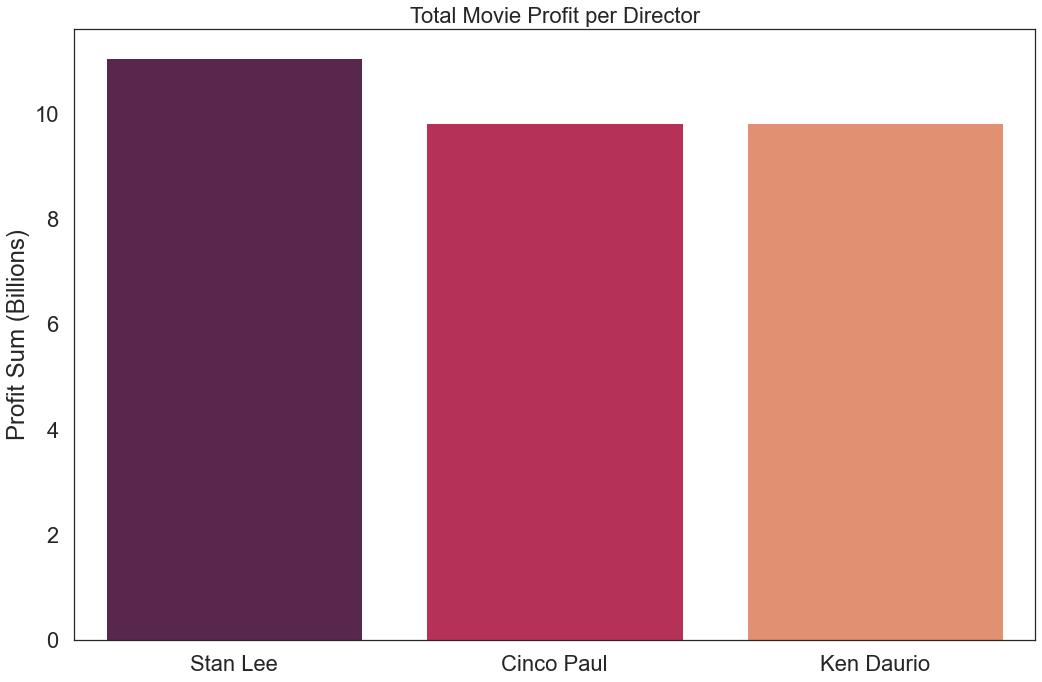

In [525]:
top_crew(fcrew,['writer'],'Total Movie Profit per Director')

In [524]:
fcrew.loc[fcrew['primary_name']=='Michael Giacchino'].drop_duplicates()

,category,tconst,primary_name,characters,primaryTitle,genres,release_date,Budget (MM),Gross (MM),Profit (MM),Profit (B)
5126,composer,tt1216475,Michael Giacchino,NaN,Cars 2,"Adventure,Animation,Comedy","Jun 24, 2011",200.0,560.155383,360.155383,0.360155
9547,composer,tt2380307,Michael Giacchino,NaN,Coco,"Adventure,Animation,Comedy","Nov 22, 2017",175.0,798.008101,623.008101,0.623008
10708,composer,tt3606756,Michael Giacchino,NaN,Incredibles 2,"Action,Adventure,Animation","Jun 15, 2018",200.0,1242.520711,1042.520711,1.042521
2991,composer,tt1617661,Michael Giacchino,NaN,Jupiter Ascending,"Action,Adventure,Sci-Fi","Feb 6, 2015",179.0,181.982519,2.982519,0.002983
3152,composer,tt1964418,Michael Giacchino,NaN,Tomorrowland,"Action,Adventure,Family","May 22, 2015",170.0,206.627518,36.627518,0.036628
7129,composer,tt1306980,Michael Giacchino,NaN,50/50,"Comedy,Drama,Romance","Sep 30, 2011",8.0,41.334735,33.334735,0.033335


# time of year

In [336]:
f['release_month'] = f['release_date'].map(lambda x : x[:4])

In [337]:
f['release_day'] = f['release_date'].map(lambda x : x[4:6])

In [338]:
f['release_day'] = f['release_day'].str.strip(',')
f['release_day'] = f['release_day'].astype(int)

In [357]:
month= f.groupby(by='release_month').mean().reset_index()
month['release_month'] = month['release_month'].str.strip()

In [358]:
month_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [359]:
month = month.set_index('release_month')
month = month.loc[month_list]

In [364]:
month[['Gross (MM)']]

,Gross (MM)
release_month,
Jan,56.263923
Feb,89.493970
Mar,115.112556
Apr,84.501328
May,195.325810
Jun,167.529097
Jul,157.369936
Aug,70.057389
Sep,50.761861


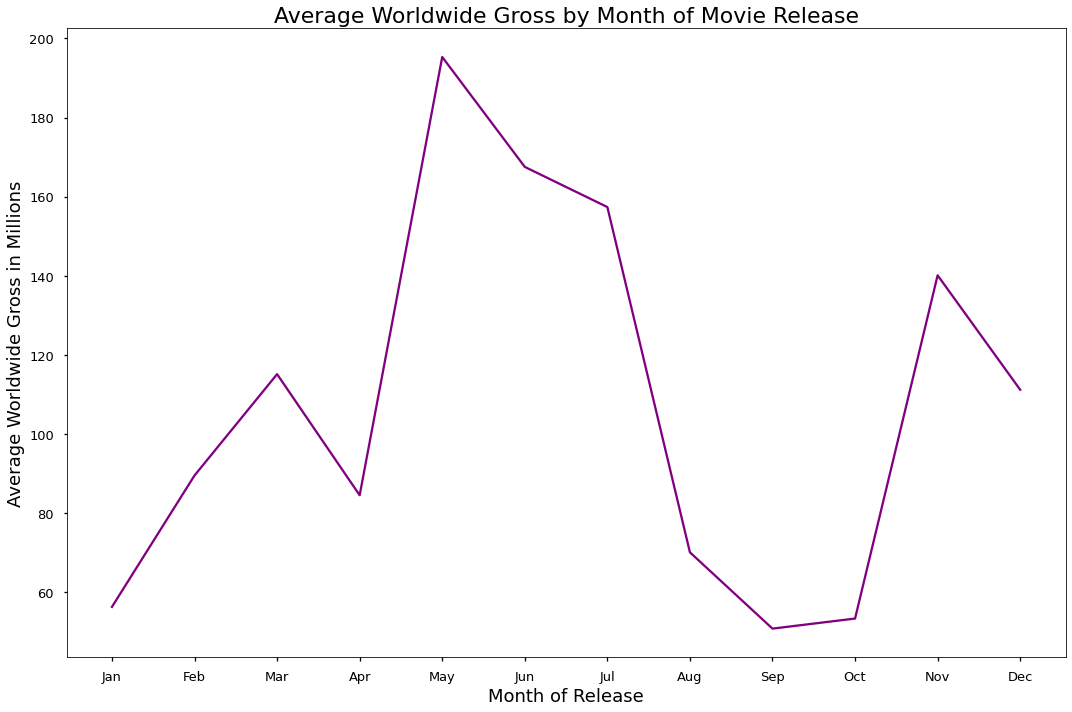

In [363]:
# Bar Plot of Ratings by Genre
fig, ax = plt.subplots(figsize=(15,10))
lplot = sns.lineplot(x = 'release_month',
            y = 'Gross (MM)',
            data = month,
            ax = ax,
            color = 'purple')
fig.tight_layout()

# set labels
plt.xlabel("Month of Release", size=18)
plt.ylabel("Average Worldwide Gross in Millions", size=18)
plt.title("Average Worldwide Gross by Month of Movie Release", size=22)

plt.tight_layout()

## Conclusion

- Microsoft should create Animated, Adventure, or Action movies, as these genre's have the highest median profit
- 
- Microsoft should aim to release movies in early summer, as May, June, and July have the highest average movie gross. 

## Next Steps

In [ ]:
- 